In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
#from anndata import AnnData
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), 'Documents/git/Xct'))

    from scTenifoldXct.main import *
    import scTenifoldXct.dNN as dNN    
    import scTenifoldXct.visualization as vis
    
except ImportError:
    print('Module not found')

In [3]:
ada = sc.read_h5ad("../data/uterus_processed.h5ad")
ada

AnnData object with n_obs × n_vars = 12115 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Percent_mito', 'RNA_snn_res.0.1', 'seurat_clusters', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

In [4]:
ada_WT = ada[ada.obs['orig.ident'] == 'WT', :].copy()
ada_KO = ada[ada.obs['orig.ident'] == 'ACD+/-', :].copy()
ada_WT.shape, ada_KO.shape

((6487, 3000), (2177, 3000))

In [5]:
sc.pp.subsample(ada_WT, n_obs = ada_KO.shape[0], random_state=0, copy = False)

ada_WT.obs['ident'].value_counts()

stromal cells        760
myocytes             649
epithelial cells     481
endothelial cells    118
pericytes             79
lymphocytes           50
mesothelial cells     24
myeloid cells         16
Name: ident, dtype: int64

In [6]:
ada_KO.obs['ident'].value_counts()

stromal cells        629
epithelial cells     575
myocytes             551
pericytes            181
endothelial cells    165
mesothelial cells     31
lymphocytes           24
myeloid cells         21
Name: ident, dtype: int64

## tumor vs adjacent normal:

In [7]:
# obj1 = Xct(ada_WT, 'stromal cells', 'epithelial cells', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Stro2Epi_WT', mode = 'full', verbose=True)

obj1 = Xct(ada_WT, 'stromal cells', 'epithelial cells', specis='Mouse', build_GRN = False,
           pcNet_name = 'Net_Stro2Epi_WT', mode = 'full', verbose=True)

print(obj1)

init an Xct object for interactions from stromal cells (760) to epithelial cells (481)...
loading GRNs...
building correspondence...
init completed.

Xct object for interactions from stromal cells (760) to epithelial cells (481)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [8]:
obj1.LR_DB()

,ligand,receptor
0,Bdnf,Trpc1
1,Cxcl12,Gnai2
2,Pf4,Gnai2
3,Epor,Trpc3
4,Epor,Epo
...,...,...
8042,Acp6,Hexim1
8043,Hpgds,Ptgdr
8044,Cyp11a1,Paqr3
8045,Copa,P2ry6


In [9]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,Igf1,Ntrk2,1.107584,0.017780,1.521085,0.019882,1.373336,1.118238,1.113525,7.930607,0.139978,-0.051487
19,Igf2,Ntrk2,0.788422,0.017780,1.152232,0.019882,1.461442,1.118238,1.361481,7.930607,0.071129,-0.051487
30,Pdgfa,Ntrk2,0.046346,0.017780,0.079854,0.019882,1.723007,1.118238,6.097327,7.930607,-0.047677,-0.051487
35,Fgf7,Ntrk2,0.026744,0.017780,0.048809,0.019882,1.825041,1.118238,8.260806,7.930607,0.061327,-0.051487
37,Fgf9,Ntrk2,0.006275,0.017780,0.015284,0.019882,2.435559,1.118238,19.700781,7.930607,-0.040929,-0.051487
...,...,...,...,...,...,...,...,...,...,...,...,...
7907,Lama4,Prnp,0.280885,0.505553,0.461775,0.661282,1.644002,1.308038,2.419285,1.608521,0.008447,-0.004403
7911,Lama3,Prnp,0.002082,0.505553,0.003289,0.661282,1.580084,1.308038,27.549955,1.608521,-0.040578,-0.004403
7914,Lamb3,Prnp,0.026187,0.505553,0.047737,0.661282,1.822915,1.308038,8.343303,1.608521,-0.010494,-0.004403
7915,Lama2,Prnp,0.329609,0.505553,0.516332,0.661282,1.566499,1.308038,2.180047,1.608521,0.000217,-0.004403


In [10]:
# obj2 = Xct(ada_KO, 'stromal cells', 'epithelial cells', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Stro2Epi_KO', mode = 'full', verbose=True)


obj2 = Xct(ada_KO, 'stromal cells', 'epithelial cells', specis='Mouse', build_GRN = False,
           pcNet_name = 'Net_Stro2Epi_KO', mode = 'full', verbose=True)

print(obj2)

init an Xct object for interactions from stromal cells (629) to epithelial cells (575)...
loading GRNs...
building correspondence...
init completed.

Xct object for interactions from stromal cells (629) to epithelial cells (575)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [11]:
df2 = obj2.fill_metric()
df2

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,Igf1,Ntrk2,0.808645,0.007437,1.440875,0.006866,1.781840,0.923114,1.484415,11.140774,0.258270,-0.071430
19,Igf2,Ntrk2,0.856243,0.007437,1.138675,0.006866,1.329850,0.923114,1.246244,11.140774,0.024468,-0.071430
30,Pdgfa,Ntrk2,0.049353,0.007437,0.107408,0.006866,2.176321,0.923114,6.640570,11.140774,0.020133,-0.071430
35,Fgf7,Ntrk2,0.044556,0.007437,0.076335,0.006866,1.713223,0.923114,6.200857,11.140774,-0.006793,-0.071430
37,Fgf9,Ntrk2,0.005052,0.007437,0.008009,0.006866,1.585164,0.923114,17.712866,11.140774,0.024886,-0.071430
...,...,...,...,...,...,...,...,...,...,...,...,...
7911,Lama3,Prnp,0.008808,0.337906,0.016520,0.382702,1.875685,1.132569,14.593208,1.830772,-0.086454,0.072830
7915,Lama2,Prnp,0.293749,0.337906,0.469482,0.382702,1.598240,1.132569,2.332558,1.830772,0.014178,0.072830
7969,Dpp4,Ada,0.020345,0.118253,0.046652,0.145239,2.293080,1.228207,10.616537,3.222779,0.000508,0.025414
8008,Alcam,Chl1,0.270373,0.002056,0.454043,0.002427,1.679318,1.180263,2.492210,23.958297,-0.015372,-0.069107


In [12]:
#selected LR pairs
candidates1 = get_candidates(df1)
print(len(candidates1))

candidates2 = get_candidates(df2)
print(len(candidates2))

377
331


In [13]:
candidates_union = list(set(candidates1).union(set(candidates2)))
len(candidates_union)

444

In [14]:
candidates_inter = list(set(candidates1).intersection(set(candidates2)))
len(candidates_inter)

264

#### single object:

1:

In [15]:
counts_np1 = get_counts_np(obj1)
len(counts_np1), counts_np1[0].shape, counts_np1[1].shape

(2, (3000, 760), (3000, 481))

In [16]:
projections1, losses1 = dNN.train_and_project(counts_np1, obj1._w, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=760, out_features=152, bias=True)
  (linear2): Linear(in_features=152, out_features=38, bias=True)
  (linear3): Linear(in_features=38, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=481, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
1 6620.8359375
100 855.1785278320312
200 849.6100463867188
300 848.9371948242188
400 847.9473876953125
500 848.7149658203125
600 848.3681030273438
700 847.815185546875
800 848.4537353515625
900 848.356689453125
1000 847.595458984375


In [17]:
df_nn1 = nn_aligned_dist(obj1, projections1)
df_nn1

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
Vcan_Snw1,"(2467, 181)",6.768928e-07,1,5.206982e+01
Col6a1_Pls3,"(1123, 938)",1.511730e-06,2,7.626214e+01
S100a10_Dnaja1,"(2328, 1445)",1.904825e-06,3,6.132645e+01
Enpp2_Cdkl1,"(2181, 2700)",2.121643e-06,4,5.642300e+01
Eif5b_S100a6,"(941, 1008)",2.687213e-06,5,5.325045e+01
...,...,...,...,...
Arg2_Cd8b1,"(487, 2354)",3.255892e-02,8999996,9.419582e-48
Arg2_Lat2,"(487, 2353)",3.255892e-02,8999997,9.419582e-48
Arg2_Bcl6b,"(487, 2348)",3.255892e-02,8999998,9.419582e-48
Arg2_1700019N19Rik,"(487, 2367)",3.255892e-02,8999999,9.419582e-48


In [18]:
df_enriched1 = chi2_test(df_nn1, df = 3, pval = 0.05, FDR = True, candidates = candidates1)

df_enriched1


Total enriched: 6 / 9000000


,idx,dist,rank,correspondence_score,q_val,enriched_rank
Anxa2_Plat,"(1423, 2711)",0.000374,10683,72.725449,0.000779,1
Lama2_Rpsa,"(703, 1003)",0.001492,43451,43.991668,0.012188,2
Ptn_Ncl,"(2048, 1756)",0.001593,46607,307.104318,0.013821,3
Igf1_Fgfr2,"(2411, 969)",0.002087,61864,24.531405,0.023398,4
Tgfb2_Plat,"(1408, 2711)",0.002530,76925,19.611642,0.033493,5
Igf2_Fgfr2,"(2080, 969)",0.002632,80641,16.136942,0.035994,6


2:

In [19]:
counts_np2 = get_counts_np(obj2)
len(counts_np2), counts_np2[0].shape, counts_np2[1].shape

(2, (3000, 629), (3000, 575))

In [20]:
projections2, losses2 = dNN.train_and_project(counts_np2, obj2._w, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=629, out_features=140, bias=True)
  (linear2): Linear(in_features=140, out_features=35, bias=True)
  (linear3): Linear(in_features=35, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=575, out_features=132, bias=True)
  (linear2): Linear(in_features=132, out_features=33, bias=True)
  (linear3): Linear(in_features=33, out_features=2, bias=True)
)
1 5857.44287109375
100 901.277587890625
200 804.6864013671875
300 806.2598876953125
400 802.6671142578125
500 800.975830078125
600 800.760009765625
700 802.5319213867188
800 800.6726684570312
900 802.1575927734375
1000 801.080322265625


In [21]:
df_nn2 = nn_aligned_dist(obj2, projections2)
df_nn2

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
Gm10123_Lig1,"(47, 2615)",0.000004,1,6.889660e+01
Enpp2_Fxyd3,"(2181, 2692)",0.000005,2,5.500793e+01
Meg3_Tspan8,"(1642, 2733)",0.000005,3,6.663210e+01
Col6a1_Coro2a,"(1123, 2742)",0.000005,4,5.071805e+01
Rpl7_Spc25,"(276, 2832)",0.000005,5,7.766755e+01
...,...,...,...,...
4930455G09Rik_Gm16602,"(2633, 2638)",0.032172,8999996,9.840403e-48
Clca3_Gm16352,"(2503, 1982)",0.032172,8999997,9.840403e-48
Clca3_Gm5878,"(2503, 1983)",0.032172,8999998,9.840403e-48
4930455G09Rik_Ccr7,"(2633, 2651)",0.032172,8999999,9.840403e-48


In [22]:
df_enriched2 = chi2_test(df_nn2, df = 3, pval = 0.05, FDR = True, candidates = candidates2)

df_enriched2


Total enriched: 5 / 9000000


,idx,dist,rank,correspondence_score,q_val,enriched_rank
Lama2_Rpsa,"(703, 1003)",0.001468,44020,58.693987,0.011422,1
Wnt16_Fzd10,"(2442, 2271)",0.001697,51010,24.805712,0.015204,2
Anxa2_Plat,"(1423, 2711)",0.001797,53981,18.423958,0.017062,3
Ptn_Ncl,"(2048, 1756)",0.002490,75931,714.549470,0.032215,4
Igf1_Epha4,"(2411, 1728)",0.003070,96215,14.413823,0.047557,5


#### merged object:

In [23]:
obj1._w.shape, obj2._w.shape

((6000, 6000), (6000, 6000))

In [24]:
counts_np12 = get_counts_np(obj1, obj2)
len(counts_np12), counts_np12[0].shape, counts_np12[1].shape, counts_np12[2].shape, counts_np12[3].shape

(4, (3000, 760), (3000, 481), (3000, 629), (3000, 575))

In [25]:
W = build_W(obj1, obj2)
W.shape

(12000, 12000)

In [26]:
projections12, losses12 = dNN.train_and_project(counts_np12, w = W, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=760, out_features=152, bias=True)
  (linear2): Linear(in_features=152, out_features=38, bias=True)
  (linear3): Linear(in_features=38, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=481, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=629, out_features=140, bias=True)
  (linear2): Linear(in_features=140, out_features=35, bias=True)
  (linear3): Linear(in_features=35, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=575, out_features=132, bias=True)
  (linear2): Linear(in_features=132, out_features=33, bias=True)
  (linear3): Linear(in_features=33, out_features=2, bias=True)
)
1 10968.50390625
100 854.9552612304688
200 843.43408203125
300 842.6954345703125
400 840.50146484375
500 839.8231201171875
600 839.5582275390625
700 839.0114135742188
800 839.0062866210938
900 838

In [27]:
projections12.shape

(12000, 2)

In [28]:
projections_split = np.array_split(projections12, 2) #return a list of ndarray
projections_split[0].shape, projections_split[1].shape

((6000, 2), (6000, 2))

In [29]:
df_nn1 = nn_aligned_dist(obj1, projections_split[0])
df_nn2 = nn_aligned_dist(obj2, projections_split[1])

df_nn1.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...
computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
Hnrnpab_Cyb5r3,"(1363, 2760)",4.480361e-07,1,81.698899
Tpm1_Hspa4,"(2425, 49)",6.896772e-07,2,50.408960
H1f0_Pdlim1,"(691, 2694)",8.488802e-07,3,52.737143
Fbxo32_Dbi,"(136, 2108)",1.011699e-06,4,49.475193
Igf1_Smarcc1,"(2411, 682)",1.361122e-06,5,50.683740


In [30]:
df_nn_all = nn_aligned_dist_diff(df_nn1, df_nn2)

df_nn_all

,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff2,diff2_rank
Cdh5_Gstm7,"(2451, 2794)",0.007898,644596,4.444073,"(2451, 2794)",0.018679,4996816,0.003232,1.162267e-04,1
mt-Tv_Gm13696,"(898, 2230)",0.019344,5444578,0.000994,"(898, 2230)",0.008699,712820,3.591633,1.133283e-04,2
Cdh5_BC048679,"(2451, 2309)",0.009375,880581,2.733663,"(2451, 2309)",0.019882,5564324,0.002584,1.103823e-04,3
Vit_Gstm7,"(958, 2794)",0.006755,498949,5.659692,"(958, 2794)",0.017247,4388054,0.008177,1.100787e-04,4
Cdh5_Isg15,"(2451, 2337)",0.010295,1135818,2.083723,"(2451, 2337)",0.020713,6021667,0.001706,1.085437e-04,5
...,...,...,...,...,...,...,...,...,...,...
Junb_Fgf16,"(2400, 123)",0.017728,4720392,0.043332,"(2400, 123)",0.017728,4590860,0.039484,3.469447e-18,8999996
2810029C07Rik_Igfbp3,"(285, 2951)",0.020192,5861168,0.003049,"(285, 2951)",0.020192,5726647,0.003137,3.469447e-18,8999997
Slc7a11_Dapl1,"(1397, 778)",0.021788,6899903,0.000389,"(1397, 778)",0.021788,6736500,0.001731,3.469447e-18,8999998
1700007G11Rik_Brca2,"(803, 1904)",0.015405,3624241,0.034835,"(803, 1904)",0.015405,3517359,0.036200,0.000000e+00,8999999


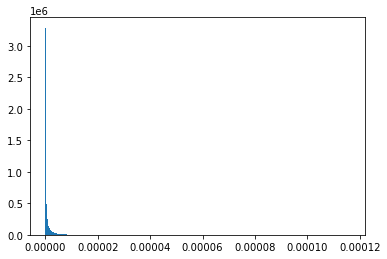

In [31]:
plt.hist(df_nn_all['diff2'], bins=1000)
plt.show()

In [32]:
df_enriched_diff = chi2_diff_test(df_nn_all, df=3, FDR=False, candidates=candidates_union)
df_enriched_diff


Total enriched: 2 / 9000000


,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff2,diff2_rank,p_val,enriched_rank
Lamb3_Itga6,"(1023, 2278)",0.012449,2094676,0.403488,"(1023, 2278)",0.015742,3676743,3.079815e-24,0.000011,124123,0.023247,1
Thbs1_Itga6,"(2466, 2278)",0.005063,317002,4.295533,"(2466, 2278)",0.008102,628004,6.109330e-01,0.000009,159334,0.044041,2


#### GSEA:

In [33]:
genelist = get_genelist(df_enriched_diff)
len(genelist)

3

In [35]:
import gseapy as gp

enr = gp.enrichr(gene_list= genelist,
                 gene_sets='GO_Biological_Process_2021',
                 organism='Human', 
                 outdir=None, #'enrichr_kegg',
                 no_plot=True,
                 cutoff=0.05 
                )

In [36]:
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,hemidesmosome assembly (GO:0031581),2/12,9.896292e-07,0.000072,0,0,3997.400000,55267.794537,LAMB3;ITGA6
1,GO_Biological_Process_2021,extracellular structure organization (GO:0043062),3/216,1.242347e-06,0.000072,0,0,59352.000000,807098.669169,LAMB3;ITGA6;THBS1
2,GO_Biological_Process_2021,external encapsulating structure organization ...,3/217,1.259763e-06,0.000072,0,0,59349.000000,806231.645416,LAMB3;ITGA6;THBS1
3,GO_Biological_Process_2021,extracellular matrix organization (GO:0030198),3/300,3.341573e-06,0.000143,0,0,59100.000000,745195.973660,LAMB3;ITGA6;THBS1
4,GO_Biological_Process_2021,positive regulation of phosphate metabolic pro...,2/30,6.518792e-06,0.000223,0,0,1426.357143,17031.876058,ITGA6;THBS1
5,GO_Biological_Process_2021,cell-substrate junction assembly (GO:0007044),2/34,8.405895e-06,0.000240,0,0,1247.812500,14582.657189,LAMB3;ITGA6
6,GO_Biological_Process_2021,regulation of extrinsic apoptotic signaling pa...,2/64,3.017744e-05,0.000737,0,0,643.064516,6693.282857,ITGA6;THBS1
7,GO_Biological_Process_2021,negative regulation of apoptotic signaling pat...,2/78,4.493097e-05,0.000898,0,0,524.236842,5247.811714,ITGA6;THBS1
8,GO_Biological_Process_2021,negative regulation of extrinsic apoptotic sig...,2/80,4.727687e-05,0.000898,0,0,510.743590,5086.745365,ITGA6;THBS1
9,GO_Biological_Process_2021,collagen fibril organization (GO:0030199),2/89,5.856991e-05,0.001002,0,0,457.701149,4460.430229,LAMB3;ITGA6


#### vis:

In [37]:
Xct.add_names_to_nets(obj1)
Xct.add_names_to_nets(obj2)

completed.
completed.


In [38]:
targets = vis.get_Xct_pairs(df_enriched_diff)
targets

(['Lamb3', 'Itga6'], ['Thbs1', 'Itga6'])

In [41]:
scale_factor = 10

identified 153 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

identified 153 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 40

edge from Thbs1 to Itga6 added


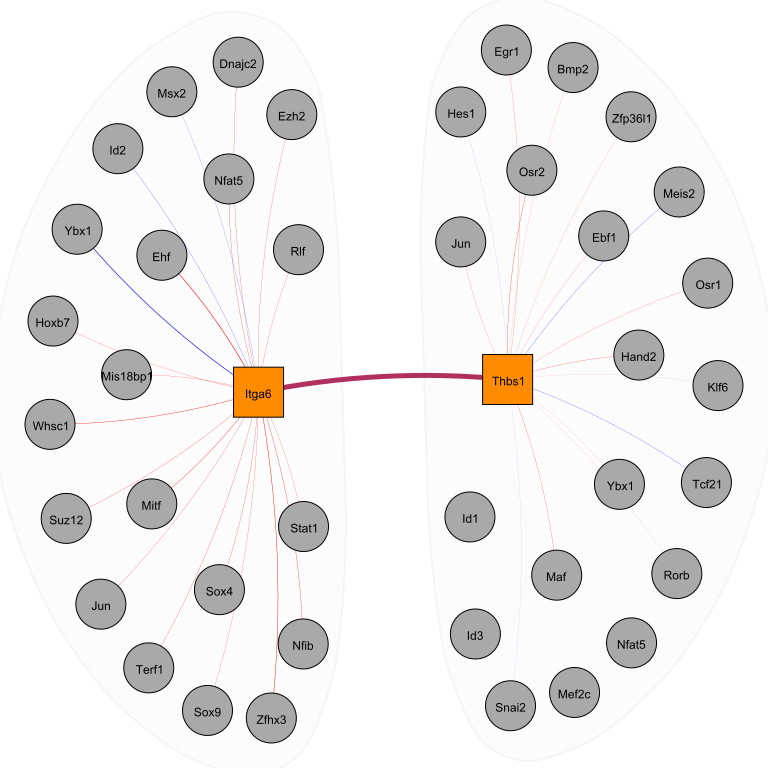

In [42]:
g1 = vis.plot_pcNet(obj1, view='sender', gene_names=[targets[1][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', gene_names=[targets[1][1]], top_edges=20, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[1]], verbose = True, edge_width_scale=scale_factor)

identified 153 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

identified 153 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 40

edge from Thbs1 to Itga6 added


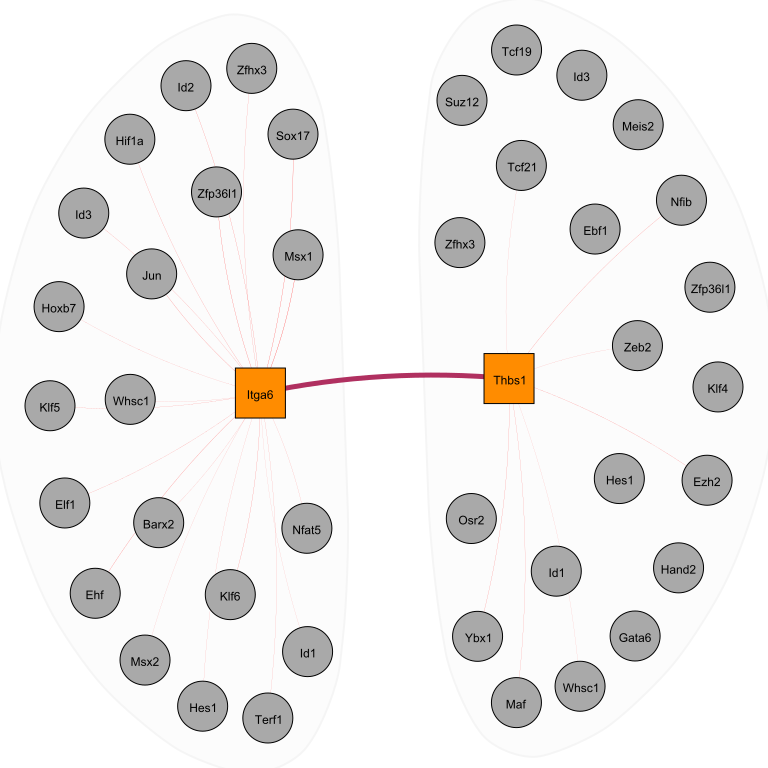

In [43]:
g1 = vis.plot_pcNet(obj2, view='sender', gene_names=[targets[1][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj2, view='receiver', gene_names=[targets[1][1]], top_edges=20, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[1]], verbose = True, edge_width_scale=scale_factor)